**Trying some classic ML model on MNIST dataset**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import shutil
shutil.copyfile("/content/drive/My Drive/Colab Notebooks/kaggle/kaggle.json", "/root/.kaggle/kaggle.json")
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/mnist/data/train.csv')
X_test  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/mnist/data/test.csv')

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data[train_data.columns[1:]], train_data.label, test_size=0.3)

**Random Forest**

In [0]:
score = []

for n in range(1, 150, 5):
  forest = RandomForestClassifier(n_estimators=n, n_jobs=-1).fit(X_train, y_train)
  y_pred = forest.predict(X_valid)
  score.append(accuracy_score(y_valid, y_pred))
  
  sys.stdout.write('\r')
  sys.stdout.write('{}/150'.format(n))
  sys.stdout.flush()

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(range(1, 150, 5), score, label='Accuracy score')
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')


In [0]:
best_n_estimators = 70

In [0]:
score = []

for n in range(1, 60, 5):
  forest = RandomForestClassifier(n_estimators=best_n_estimators, 
                                  max_depth=n,
                                  n_jobs=-1).fit(X_train, y_train)
  y_pred = forest.predict(X_valid)
  score.append(accuracy_score(y_valid, y_pred))
  
  sys.stdout.write('\r')
  sys.stdout.write('{}/60'.format(n))
  sys.stdout.flush()

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(range(1, 60, 5), score, label='Accuracy score')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')

In [0]:
best_max_depth = 15

In [0]:
forest = RandomForestClassifier(n_estimators=best_n_estimators, 
                                max_depth=best_max_depth, n_jobs=-1)

cv_results = cross_validate(forest, X_train, y_train, cv=5,
                            return_train_score=False, scoring='accuracy')

sorted(cv_results.keys())                         
cv_results['test_score']    


array([0.9535951 , 0.95460728, 0.96497194, 0.95542702, 0.95779442])

**XGBoost**

In [0]:
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators  = range(0, 100, 5)
max_depth     = range(0, 50, 5)

In [0]:
score = []

for n in max_depth:
  sys.stdout.write('{}/50'.format(n))
  
  xgb = xgboost.XGBClassifier(max_depth=n, n_estimators=10, learning_rate=0.1,
                              n_jobs=-1).fit(X_train, y_train)
  y_pred = xgb.predict(X_valid)
  score.append(accuracy_score(y_valid, y_pred))
  
  sys.stdout.flush()
  sys.stdout.write('\r')


Text(0, 0.5, 'accuracy')

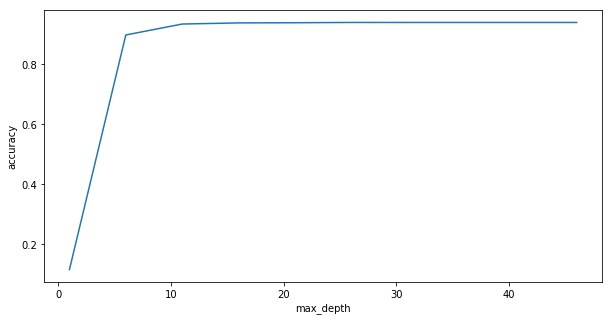

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(range(1, 50, 5), score, label='Accuracy score')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')

In [0]:
best_max_depth = 10

In [0]:
score = []

for n in n_estimators:
  sys.stdout.write('{}/50'.format(n))
  
  xgb = xgboost.XGBClassifier(max_depth=10, n_estimators=n, learning_rate=0.1,
                              n_jobs=-1).fit(X_train, y_train)
  y_pred = xgb.predict(X_valid)
  score.append(accuracy_score(y_valid, y_pred))
  
  sys.stdout.flush()
  sys.stdout.write('\r')

Text(0, 0.5, 'accuracy')

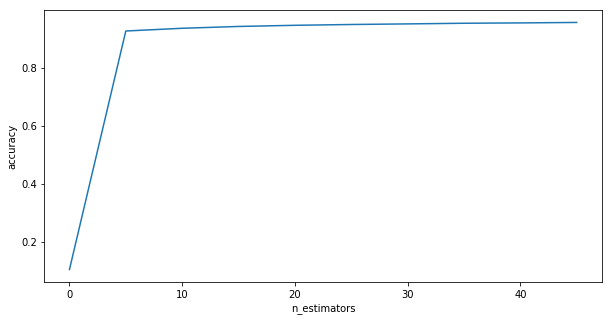

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(range(0, 50, 5), score, label='Accuracy score')
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')

In [0]:
xgb = xgboost.XGBClassifier(max_depth=10, n_estimators=5, learning_rate=2,
                            n_jobs=-1).fit(X_train, y_train)
y_pred = xgb.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8738095238095238

Text(0, 0.5, 'accuracy')

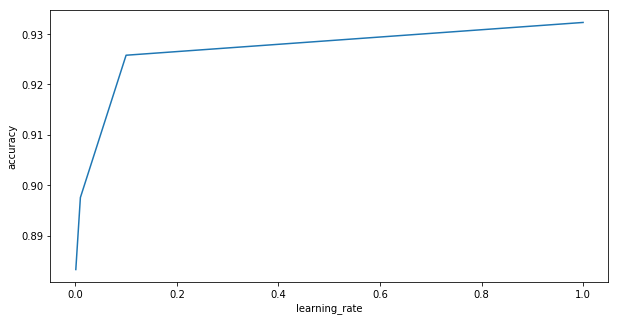

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot([0.001, 0.01, 0.1, 1], score, label='Accuracy score')
ax.set_xlabel('learning_rate')
ax.set_ylabel('accuracy')

Final predict: *0.93185*

In [0]:
xgb = xgboost.XGBClassifier(max_depth=10, n_estimators=5, learning_rate=1,
                              n_jobs=-1).fit(X_train, y_train)

y_pred = xgb.predict(X_test)

results = pd.DataFrame(index=range(1, 28001), columns=['ImageId', 'Label'])
results.ImageId = range(1, 28001)
results.Label = y_pred


**KNN**

In [0]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print accuracy_score(y_valid, y_pred)

In [0]:
y_pred = knn.predict(X_test)

results = pd.DataFrame(index=range(1, 28001), columns=['ImageId', 'Label'])
results.ImageId = range(1, 28001)
results.Label = y_pred

In [0]:
results.to_csv('results.csv', index=False)